In [1]:
import pandas as pd
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### FIltering by species
        indices = iris['species'] == 'setosa'
        setosa = iris.loc[indices,:] # extract new Dataframe
        indices = iris['species'] == 'versicolor'
        versicolor = iris.loc[indices,:] # extract new Dataframe
        indices = iris['species'] == 'virginica'
        virginica = iris.loc[indices,:] # extract new Dataframe
#### Visual EDA: induvidual factors
        setosa.plot(kind='hist',bins=50,range=(0,8),alpha=0.3)
        plt.title('Setosa Data set')
        plt.xlabel('[cm]')
        
        versicolor.plot(kind='hist',bins=50,range=(0,8),alpha=0.3)
        plt.title('Versicolor Data set')
        plt.xlabel('[cm]')
        
        virginica.plot(kind='hist',bins=50,range=(0,8),alpha=0.3)
        plt.title('virginica Data set')
        plt.xlabel('[cm]')

    ##### Compute the global mean and global standard deviation: global_mean, global_std
    global_mean = df.mean()
    global_std = df.std()

    ##### Filter the US population from the origin column: us
    us = df[df['origin']=='US']

    ##### Compute the US mean and US standard deviation: us_mean, us_std
    us_mean = us.mean()
    us_std = us.std()

    ##### Print the differences
    print(us_mean - global_mean)
    print(us_std - global_std)

#### Indexing Time Series
`read_csv()` function
- Can read strings into datetime objects
- Need to specify 'parse_dates=True'

ISO 8601 format
- yyyy-mm-dd hh:mm:ss 

When we know all the rows contain non-null datetime objects we can specify the parse_dates parameter in the read_csv() function. Furthur, if we are using the Date column as the index then we can specify `index_col='Date'`, here Date is the name of the Date column.

#### Selecting the data using the datetime object
We can use the inbuilt `loc` method to completely specify the data of a particular column using the date in the x-place and the column name in the y-place.

    sales.loc['2012-2-5','Company'] # Only the company column is returned
    
#### Partial String Selection
    sales.loc['2012-2-5'] #All the columns are returned with the date
    
#### Alternative Formats to select 2012-2-5
    sales.loc['February 5,2012']
    sales.loc['2012-Feb-5']
#### Selecting whole month
    sales.loc['2012-2']
#### Selecting whole year
    sales.loc['2012']
#### Slicing using dates/times
    sales.loc['2012-5-15':'2012-5-25']
#### Convert Strings to datetime objects
The pandas `pd.to_datetime()` function converts the string to pandas datetime objects.
        
        evening_2_11 = pd.to_datetime(['2012-2-11 20:00','2012-2-11' 21:00])
#### Reindexing the dataframe using the evening of 2-11
Here we can reindex the dataframe according to the new evening times
    
    sales.reindex(evening_2_11)
#### Reindexing the Index
Reindexing is useful in preparation for adding or otherwise combining two time series data sets. To reindex the data, we provide a new index and ask pandas to try and match the old data to the new index. If data is unavailable for one of the new index dates or times, you must tell pandas how to fill it in. Otherwise, pandas will fill with NaN by default.
    
#### Filling the missing values
While reindexing the missing values 'NaN' can be filled in two ways
- method='ffill' Will fill the empty entries with the nearest preceding non-null entry in each column
- method='bfill' will fill the empty entries with the nearest following non-null entry in each column
    
    sales.reindex(evening_2_11,method='ffill')

#### Creating and using a DatetimeIndex
The pandas Index is a powerful way to handle time series data, so it is valuable to know how to build one yourself. Pandas provides the pd.to_datetime() function for just this task. For example, if passed the list of strings `['2015-01-01 091234','2015-01-01 091234']` and a format specification variable, such as `format='%Y-%m-%d %H%M%S`, pandas will parse the string into the proper datetime elements and build the datetime objects.

Your job is to use the `.to_datetime()` method to build a DatetimeIndex out of the list of date strings, and to then use it along with the list of temperature data to build a pandas Series.

In [6]:
date_list = ['20100101 00:00',
 '20100101 01:00',
 '20100101 02:00',
 '20100101 03:00',
 '20100101 04:00',
 '20100101 05:00',
 '20100101 06:00',
 '20100101 07:00',
 '20100101 08:00',
 '20100101 09:00',
 '20100101 10:00',
 '20100101 11:00',
 '20100101 12:00',
 '20100101 13:00',
 '20100101 14:00',
 '20100101 15:00',
 '20100101 16:00',
 '20100101 17:00',
 '20100101 18:00',
 '20100101 19:00',
 '20100101 20:00',
 '20100101 21:00',
 '20100101 22:00',
 '20100101 23:00',
 '20100102 00:00',
 '20100102 01:00',
 '20100102 02:00',
 '20100102 03:00',
 '20100102 04:00',
 '20100102 05:00',
 '20100102 06:00',
 '20100102 07:00',
 '20100102 08:00',
 '20100102 09:00',
 '20100102 10:00',
 '20100102 11:00',
 '20100102 12:00',
 '20100102 13:00',
 '20100102 14:00',
 '20100102 15:00',
 '20100102 16:00',
 '20100102 17:00',
 '20100102 18:00',
 '20100102 19:00',
 '20100102 20:00',
 '20100102 21:00',
 '20100102 22:00',
 '20100102 23:00',
 '20100103 00:00',
 '20100103 01:00',
 '20100103 02:00',
 '20100103 03:00',
 '20100103 04:00',
 '20100103 05:00',
 '20100103 06:00',
 '20100103 07:00',
 '20100103 08:00',
 '20100103 09:00',
 '20100103 10:00',
 '20100103 11:00',
 '20100103 12:00',
 '20100103 13:00',
 '20100103 14:00',
 '20100103 15:00',
 '20100103 16:00',
 '20100103 17:00',
 '20100103 18:00',
 '20100103 19:00',
 '20100103 20:00',
 '20100103 21:00',
 '20100103 22:00',
 '20100103 23:00',
 '20100104 00:00',
 '20100104 01:00',
 '20100104 02:00',
 '20100104 03:00',
 '20100104 04:00',
 '20100104 05:00',
 '20100104 06:00',
 '20100104 07:00',
 '20100104 08:00',
 '20100104 09:00',
 '20100104 10:00',
 '20100104 11:00',
 '20100104 12:00',
 '20100104 13:00',
 '20100104 14:00',
 '20100104 15:00',
 '20100104 16:00',
 '20100104 17:00',
 '20100104 18:00',
 '20100104 19:00',
 '20100104 20:00',
 '20100104 21:00',
 '20100104 22:00',
 '20100104 23:00',
 '20100105 00:00',
 '20100105 01:00',
 '20100105 02:00',
 '20100105 03:00',
 '20100105 04:00',
 '20100105 05:00',
 '20100105 06:00',
 '20100105 07:00',
 '20100105 08:00',
 '20100105 09:00',
 '20100105 10:00',
 '20100105 11:00',
 '20100105 12:00',
 '20100105 13:00',
 '20100105 14:00',
 '20100105 15:00',
 '20100105 16:00',
 '20100105 17:00',
 '20100105 18:00',
 '20100105 19:00',
 '20100105 20:00',
 '20100105 21:00',
 '20100105 22:00',
 '20100105 23:00',
 '20100106 00:00',
 '20100106 01:00',
 '20100106 02:00',
 '20100106 03:00',
 '20100106 04:00',
 '20100106 05:00',
 '20100106 06:00',
 '20100106 07:00',
 '20100106 08:00',
 '20100106 09:00',
 '20100106 10:00',
 '20100106 11:00',
 '20100106 12:00',
 '20100106 13:00',
 '20100106 14:00',
 '20100106 15:00',
 '20100106 16:00',
 '20100106 17:00',
 '20100106 18:00',
 '20100106 19:00',
 '20100106 20:00',
 '20100106 21:00',
 '20100106 22:00',
 '20100106 23:00',
 '20100107 00:00',
 '20100107 01:00',
 '20100107 02:00',
 '20100107 03:00',
 '20100107 04:00',
 '20100107 05:00',
 '20100107 06:00',
 '20100107 07:00',
 '20100107 08:00',
 '20100107 09:00',
 '20100107 10:00',
 '20100107 11:00',
 '20100107 12:00',
 '20100107 13:00',
 '20100107 14:00',
 '20100107 15:00',
 '20100107 16:00',
 '20100107 17:00',
 '20100107 18:00',
 '20100107 19:00',
 '20100107 20:00',
 '20100107 21:00',
 '20100107 22:00',
 '20100107 23:00',
 '20100108 00:00',
 '20100108 01:00',
 '20100108 02:00',
 '20100108 03:00',
 '20100108 04:00',
 '20100108 05:00',
 '20100108 06:00',
 '20100108 07:00',
 '20100108 08:00',
 '20100108 09:00',
 '20100108 10:00',
 '20100108 11:00',
 '20100108 12:00',
 '20100108 13:00',
 '20100108 14:00',
 '20100108 15:00',
 '20100108 16:00',
 '20100108 17:00',
 '20100108 18:00',
 '20100108 19:00',
 '20100108 20:00',
 '20100108 21:00',
 '20100108 22:00',
 '20100108 23:00',
 '20100109 00:00',
 '20100109 01:00',
 '20100109 02:00',
 '20100109 03:00',
 '20100109 04:00',
 '20100109 05:00',
 '20100109 06:00',
 '20100109 07:00',
 '20100109 08:00',
 '20100109 09:00',
 '20100109 10:00',
 '20100109 11:00',
 '20100109 12:00',
 '20100109 13:00',
 '20100109 14:00',
 '20100109 15:00',
 '20100109 16:00',
 '20100109 17:00',
 '20100109 18:00',
 '20100109 19:00',
 '20100109 20:00',
 '20100109 21:00',
 '20100109 22:00',
 '20100109 23:00',
 '20100110 00:00',
 '20100110 01:00',
 '20100110 02:00',
 '20100110 03:00',
 '20100110 04:00',
 '20100110 05:00',
 '20100110 06:00',
 '20100110 07:00',
 '20100110 08:00',
 '20100110 09:00',
 '20100110 10:00',
 '20100110 11:00',
 '20100110 12:00',
 '20100110 13:00',
 '20100110 14:00',
 '20100110 15:00',
 '20100110 16:00',
 '20100110 17:00',
 '20100110 18:00',
 '20100110 19:00',
 '20100110 20:00',
 '20100110 21:00',
 '20100110 22:00',
 '20100110 23:00',
 '20100111 00:00',
 '20100111 01:00',
 '20100111 02:00',
 '20100111 03:00',
 '20100111 04:00',
 '20100111 05:00',
 '20100111 06:00',
 '20100111 07:00',
 '20100111 08:00',
 '20100111 09:00',
 '20100111 10:00',
 '20100111 11:00',
 '20100111 12:00',
 '20100111 13:00',
 '20100111 14:00',
 '20100111 15:00',
 '20100111 16:00',
 '20100111 17:00',
 '20100111 18:00',
 '20100111 19:00',
 '20100111 20:00',
 '20100111 21:00',
 '20100111 22:00',
 '20100111 23:00',
 '20100112 00:00',
 '20100112 01:00',
 '20100112 02:00',
 '20100112 03:00',
 '20100112 04:00',
 '20100112 05:00',
 '20100112 06:00',
 '20100112 07:00',
 '20100112 08:00',
 '20100112 09:00',
 '20100112 10:00',
 '20100112 11:00',
 '20100112 12:00',
 '20100112 13:00',
 '20100112 14:00',
 '20100112 15:00',
 '20100112 16:00',
 '20100112 17:00',
 '20100112 18:00',
 '20100112 19:00',
 '20100112 20:00',
 '20100112 21:00',
 '20100112 22:00',
 '20100112 23:00',
 '20100113 00:00',
 '20100113 01:00',
 '20100113 02:00',
 '20100113 03:00',
 '20100113 04:00',
 '20100113 05:00',
 '20100113 06:00',
 '20100113 07:00',
 '20100113 08:00',
 '20100113 09:00',
 '20100113 10:00',
 '20100113 11:00',
 '20100113 12:00',
 '20100113 13:00',
 '20100113 14:00',
 '20100113 15:00',
 '20100113 16:00',
 '20100113 17:00',
 '20100113 18:00',
 '20100113 19:00',
 '20100113 20:00',
 '20100113 21:00',
 '20100113 22:00',
 '20100113 23:00',
 '20100114 00:00',
 '20100114 01:00',
 '20100114 02:00',
 '20100114 03:00',
 '20100114 04:00',
 '20100114 05:00',
 '20100114 06:00',
 '20100114 07:00',
 '20100114 08:00',
 '20100114 09:00',
 '20100114 10:00',
 '20100114 11:00',
 '20100114 12:00',
 '20100114 13:00',
 '20100114 14:00',
 '20100114 15:00',
 '20100114 16:00',
 '20100114 17:00',
 '20100114 18:00',
 '20100114 19:00',
 '20100114 20:00',
 '20100114 21:00',
 '20100114 22:00',
 '20100114 23:00',
 '20100115 00:00',
 '20100115 01:00',
 '20100115 02:00',
 '20100115 03:00',
 '20100115 04:00',
 '20100115 05:00',
 '20100115 06:00',
 '20100115 07:00',
 '20100115 08:00',
 '20100115 09:00',
 '20100115 10:00',
 '20100115 11:00',
 '20100115 12:00',
 '20100115 13:00',
 '20100115 14:00',
 '20100115 15:00',
 '20100115 16:00',
 '20100115 17:00',
 '20100115 18:00',
 '20100115 19:00',
 '20100115 20:00',
 '20100115 21:00',
 '20100115 22:00',
 '20100115 23:00',
 '20100116 00:00',
 '20100116 01:00',
 '20100116 02:00',
 '20100116 03:00',
 '20100116 04:00',
 '20100116 05:00',
 '20100116 06:00',
 '20100116 07:00',
 '20100116 08:00',
 '20100116 09:00',
 '20100116 10:00',
 '20100116 11:00',
 '20100116 12:00',
 '20100116 13:00',
 '20100116 14:00',
 '20100116 15:00',
 '20100116 16:00',
 '20100116 17:00',
 '20100116 18:00',
 '20100116 19:00',
 '20100116 20:00',
 '20100116 21:00',
 '20100116 22:00',
 '20100116 23:00',
 '20100117 00:00',
 '20100117 01:00',
 '20100117 02:00',
 '20100117 03:00',
 '20100117 04:00',
 '20100117 05:00',
 '20100117 06:00',
 '20100117 07:00',
 '20100117 08:00',
 '20100117 09:00',
 '20100117 10:00',
 '20100117 11:00',
 '20100117 12:00',
 '20100117 13:00',
 '20100117 14:00',
 '20100117 15:00',
 '20100117 16:00',
 '20100117 17:00',
 '20100117 18:00',
 '20100117 19:00',
 '20100117 20:00',
 '20100117 21:00',
 '20100117 22:00',
 '20100117 23:00',
 '20100118 00:00',
 '20100118 01:00',
 '20100118 02:00',
 '20100118 03:00',
 '20100118 04:00',
 '20100118 05:00',
 '20100118 06:00',
 '20100118 07:00',
 '20100118 08:00',
 '20100118 09:00',
 '20100118 10:00',
 '20100118 11:00',
 '20100118 12:00',
 '20100118 13:00',
 '20100118 14:00',
 '20100118 15:00',
 '20100118 16:00',
 '20100118 17:00',
 '20100118 18:00',
 '20100118 19:00',
 '20100118 20:00',
 '20100118 21:00',
 '20100118 22:00',
 '20100118 23:00',
 '20100119 00:00',
 '20100119 01:00',
 '20100119 02:00',
 '20100119 03:00',
 '20100119 04:00',
 '20100119 05:00',
 '20100119 06:00',
 '20100119 07:00',
 '20100119 08:00',
 '20100119 09:00',
 '20100119 10:00',
 '20100119 11:00',
 '20100119 12:00',
 '20100119 13:00',
 '20100119 14:00',
 '20100119 15:00',
 '20100119 16:00',
 '20100119 17:00',
 '20100119 18:00',
 '20100119 19:00',
 '20100119 20:00',
 '20100119 21:00',
 '20100119 22:00',
 '20100119 23:00',
 '20100120 00:00',
 '20100120 01:00',
 '20100120 02:00',
 '20100120 03:00',
 '20100120 04:00',
 '20100120 05:00',
 '20100120 06:00',
 '20100120 07:00',
 '20100120 08:00',
 '20100120 09:00',
 '20100120 10:00',
 '20100120 11:00',
 '20100120 12:00',
 '20100120 13:00',
 '20100120 14:00',
 '20100120 15:00',
 '20100120 16:00',
 '20100120 17:00',
 '20100120 18:00',
 '20100120 19:00',
 '20100120 20:00',
 '20100120 21:00',
 '20100120 22:00',
 '20100120 23:00',
 '20100121 00:00',
 '20100121 01:00',
 '20100121 02:00',
 '20100121 03:00',
 '20100121 04:00',
 '20100121 05:00',
 '20100121 06:00',
 '20100121 07:00',
 '20100121 08:00',
 '20100121 09:00',
 '20100121 10:00',
 '20100121 11:00',
 '20100121 12:00',
 '20100121 13:00',
 '20100121 14:00',
 '20100121 15:00',
 '20100121 16:00',
 '20100121 17:00',
 '20100121 18:00',
 '20100121 19:00',
 '20100121 20:00',
 '20100121 21:00',
 '20100121 22:00',
 '20100121 23:00',
 '20100122 00:00',
 '20100122 01:00',
 '20100122 02:00',
 '20100122 03:00',
 '20100122 04:00',
 '20100122 05:00',
 '20100122 06:00',
 '20100122 07:00',
 '20100122 08:00',
 '20100122 09:00',
 '20100122 10:00',
 '20100122 11:00',
 '20100122 12:00',
 '20100122 13:00',
 '20100122 14:00',
 '20100122 15:00',
 '20100122 16:00',
 '20100122 17:00',
 '20100122 18:00',
 '20100122 19:00',
 '20100122 20:00',
 '20100122 21:00',
 '20100122 22:00',
 '20100122 23:00',
 '20100123 00:00',
 '20100123 01:00',
 '20100123 02:00',
 '20100123 03:00',
 '20100123 04:00',
 '20100123 05:00',
 '20100123 06:00',
 '20100123 07:00',
 '20100123 08:00',
 '20100123 09:00',
 '20100123 10:00',
 '20100123 11:00',
 '20100123 12:00',
 '20100123 13:00',
 '20100123 14:00',
 '20100123 15:00',
 '20100123 16:00',
 '20100123 17:00',
 '20100123 18:00',
 '20100123 19:00',
 '20100123 20:00',
 '20100123 21:00',
 '20100123 22:00',
 '20100123 23:00',
 '20100124 00:00',
 '20100124 01:00',
 '20100124 02:00',
 '20100124 03:00',
 '20100124 04:00',
 '20100124 05:00',
 '20100124 06:00',
 '20100124 07:00',
 '20100124 08:00',
 '20100124 09:00',
 '20100124 10:00',
 '20100124 11:00',
 '20100124 12:00',
 '20100124 13:00',
 '20100124 14:00',
 '20100124 15:00',
 '20100124 16:00',
 '20100124 17:00',
 '20100124 18:00',
 '20100124 19:00',
 '20100124 20:00',
 '20100124 21:00',
 '20100124 22:00',
 '20100124 23:00',
 '20100125 00:00',
 '20100125 01:00',
 '20100125 02:00',
 '20100125 03:00',
 '20100125 04:00',
 '20100125 05:00',
 '20100125 06:00',
 '20100125 07:00',
 '20100125 08:00',
 '20100125 09:00',
 '20100125 10:00',
 '20100125 11:00',
 '20100125 12:00',
 '20100125 13:00',
 '20100125 14:00',
 '20100125 15:00',
 '20100125 16:00',
 '20100125 17:00',
 '20100125 18:00',
 '20100125 19:00',
 '20100125 20:00',
 '20100125 21:00',
 '20100125 22:00',
 '20100125 23:00',
 '20100126 00:00',
 '20100126 01:00',
 '20100126 02:00',
 '20100126 03:00',
 '20100126 04:00',
 '20100126 05:00',
 '20100126 06:00',
 '20100126 07:00',
 '20100126 08:00',
 '20100126 09:00',
 '20100126 10:00',
 '20100126 11:00',
 '20100126 12:00',
 '20100126 13:00',
 '20100126 14:00',
 '20100126 15:00',
 '20100126 16:00',
 '20100126 17:00',
 '20100126 18:00',
 '20100126 19:00',
 '20100126 20:00',
 '20100126 21:00',
 '20100126 22:00',
 '20100126 23:00',
 '20100127 00:00',
 '20100127 01:00',
 '20100127 02:00',
 '20100127 03:00',
 '20100127 04:00',
 '20100127 05:00',
 '20100127 06:00',
 '20100127 07:00',
 '20100127 08:00',
 '20100127 09:00',
 '20100127 10:00',
 '20100127 11:00',
 '20100127 12:00',
 '20100127 13:00',
 '20100127 14:00',
 '20100127 15:00',
 '20100127 16:00',
 '20100127 17:00',
 '20100127 18:00',
 '20100127 19:00',
 '20100127 20:00',
 '20100127 21:00',
 '20100127 22:00',
 '20100127 23:00',
 '20100128 00:00',
 '20100128 01:00',
 '20100128 02:00',
 '20100128 03:00',
 '20100128 04:00',
 '20100128 05:00',
 '20100128 06:00',
 '20100128 07:00',
 '20100128 08:00',
 '20100128 09:00',
 '20100128 10:00',
 '20100128 11:00',
 '20100128 12:00',
 '20100128 13:00',
 '20100128 14:00',
 '20100128 15:00',
 '20100128 16:00',
 '20100128 17:00',
 '20100128 18:00',
 '20100128 19:00',
 '20100128 20:00',
 '20100128 21:00',
 '20100128 22:00',
 '20100128 23:00',
 '20100129 00:00',
 '20100129 01:00',
 '20100129 02:00',
 '20100129 03:00',
 '20100129 04:00',
 '20100129 05:00',
 '20100129 06:00',
 '20100129 07:00',
 '20100129 08:00',
 '20100129 09:00',
 '20100129 10:00',
 '20100129 11:00',
 '20100129 12:00',
 '20100129 13:00',
 '20100129 14:00',
 '20100129 15:00',
 '20100129 16:00',
 '20100129 17:00',
 '20100129 18:00',
 '20100129 19:00',
 '20100129 20:00',
 '20100129 21:00',
 '20100129 22:00',
 '20100129 23:00',
 '20100130 00:00',
 '20100130 01:00',
 '20100130 02:00',
 '20100130 03:00',
 '20100130 04:00',
 '20100130 05:00',
 '20100130 06:00',
 '20100130 07:00',
 '20100130 08:00',
 '20100130 09:00',
 '20100130 10:00',
 '20100130 11:00',
 '20100130 12:00',
 '20100130 13:00',
 '20100130 14:00',
 '20100130 15:00',
 '20100130 16:00',
 '20100130 17:00',
 '20100130 18:00',
 '20100130 19:00',
 '20100130 20:00',
 '20100130 21:00',
 '20100130 22:00',
 '20100130 23:00',
 '20100131 00:00',
 '20100131 01:00',
 '20100131 02:00',
 '20100131 03:00',
 '20100131 04:00',
 '20100131 05:00',
 '20100131 06:00',
 '20100131 07:00',
 '20100131 08:00',
 '20100131 09:00',
 '20100131 10:00',
 '20100131 11:00',
 '20100131 12:00',
 '20100131 13:00',
 '20100131 14:00',
 '20100131 15:00',
 '20100131 16:00',
 '20100131 17:00',
 '20100131 18:00',
 '20100131 19:00',
 '20100131 20:00',
 '20100131 21:00',
 '20100131 22:00',
 '20100131 23:00',
 '20100201 00:00',
 '20100201 01:00',
 '20100201 02:00',
 '20100201 03:00',
 '20100201 04:00',
 '20100201 05:00',
 '20100201 06:00',
 '20100201 07:00',
 '20100201 08:00',
 '20100201 09:00',
 '20100201 10:00',
 '20100201 11:00',
 '20100201 12:00',
 '20100201 13:00',
 '20100201 14:00',
 '20100201 15:00',
 '20100201 16:00',
 '20100201 17:00',
 '20100201 18:00',
 '20100201 19:00',
 '20100201 20:00',
 '20100201 21:00',
 '20100201 22:00',
 '20100201 23:00',
 '20100202 00:00',
 '20100202 01:00',
 '20100202 02:00',
 '20100202 03:00',
 '20100202 04:00',
 '20100202 05:00',
 '20100202 06:00',
 '20100202 07:00',
 '20100202 08:00',
 '20100202 09:00',
 '20100202 10:00',
 '20100202 11:00',
 '20100202 12:00',
 '20100202 13:00',
 '20100202 14:00',
 '20100202 15:00',
 '20100202 16:00',
 '20100202 17:00',
 '20100202 18:00',
 '20100202 19:00',
 '20100202 20:00',
 '20100202 21:00',
 '20100202 22:00',
 '20100202 23:00',
 '20100203 00:00',
 '20100203 01:00',
 '20100203 02:00',
 '20100203 03:00',
 '20100203 04:00',
 '20100203 05:00',
 '20100203 06:00',
 '20100203 07:00',
 '20100203 08:00',
 '20100203 09:00',
 '20100203 10:00',
 '20100203 11:00',
 '20100203 12:00',
 '20100203 13:00',
 '20100203 14:00',
 '20100203 15:00',
 '20100203 16:00',
 '20100203 17:00',
 '20100203 18:00',
 '20100203 19:00',
 '20100203 20:00',
 '20100203 21:00',
 '20100203 22:00',
 '20100203 23:00',
 '20100204 00:00',
 '20100204 01:00',
 '20100204 02:00',
 '20100204 03:00',
 '20100204 04:00',
 '20100204 05:00',
 '20100204 06:00',
 '20100204 07:00',
 '20100204 08:00',
 '20100204 09:00',
 '20100204 10:00',
 '20100204 11:00',
 '20100204 12:00',
 '20100204 13:00',
 '20100204 14:00',
 '20100204 15:00',
 '20100204 16:00',
 '20100204 17:00',
 '20100204 18:00',
 '20100204 19:00',
 '20100204 20:00',
 '20100204 21:00',
 '20100204 22:00',
 '20100204 23:00',
 '20100205 00:00',
 '20100205 01:00',
 '20100205 02:00',
 '20100205 03:00',
 '20100205 04:00',
 '20100205 05:00',
 '20100205 06:00',
 '20100205 07:00',
 '20100205 08:00',
 '20100205 09:00',
 '20100205 10:00',
 '20100205 11:00',
 '20100205 12:00',
 '20100205 13:00',
 '20100205 14:00',
 '20100205 15:00',
 '20100205 16:00',
 '20100205 17:00',
 '20100205 18:00',
 '20100205 19:00',
 '20100205 20:00',
 '20100205 21:00',
 '20100205 22:00',
 '20100205 23:00',
 '20100206 00:00',
 '20100206 01:00',
 '20100206 02:00',
 '20100206 03:00',
 '20100206 04:00',
 '20100206 05:00',
 '20100206 06:00',
 '20100206 07:00',
 '20100206 08:00',
 '20100206 09:00',
 '20100206 10:00',
 '20100206 11:00',
 '20100206 12:00',
 '20100206 13:00',
 '20100206 14:00',
 '20100206 15:00',
 '20100206 16:00',
 '20100206 17:00',
 '20100206 18:00',
 '20100206 19:00',
 '20100206 20:00',
 '20100206 21:00',
 '20100206 22:00',
 '20100206 23:00',
 '20100207 00:00',
 '20100207 01:00',
 '20100207 02:00',
 '20100207 03:00',
 '20100207 04:00',
 '20100207 05:00',
 '20100207 06:00',
 '20100207 07:00',
 '20100207 08:00',
 '20100207 09:00',
 '20100207 10:00',
 '20100207 11:00',
 '20100207 12:00',
 '20100207 13:00',
 '20100207 14:00',
 '20100207 15:00',
 '20100207 16:00',
 '20100207 17:00',
 '20100207 18:00',
 '20100207 19:00',
 '20100207 20:00',
 '20100207 21:00',
 '20100207 22:00',
 '20100207 23:00',
 '20100208 00:00',
 '20100208 01:00',
 '20100208 02:00',
 '20100208 03:00',
 '20100208 04:00',
 '20100208 05:00',
 '20100208 06:00',
 '20100208 07:00',
 '20100208 08:00',
 '20100208 09:00',
 '20100208 10:00',
 '20100208 11:00',
 '20100208 12:00',
 '20100208 13:00',
 '20100208 14:00',
 '20100208 15:00',
 '20100208 16:00',
 '20100208 17:00',
 '20100208 18:00',
 '20100208 19:00',
 '20100208 20:00',
 '20100208 21:00',
 '20100208 22:00',
 '20100208 23:00',
 '20100209 00:00',
 '20100209 01:00',
 '20100209 02:00',
 '20100209 03:00',
 '20100209 04:00',
 '20100209 05:00',
 '20100209 06:00',
 '20100209 07:00',
 '20100209 08:00',
 '20100209 09:00',
 '20100209 10:00',
 '20100209 11:00',
 '20100209 12:00',
 '20100209 13:00',
 '20100209 14:00',
 '20100209 15:00',
 '20100209 16:00',
 '20100209 17:00',
 '20100209 18:00',
 '20100209 19:00',
 '20100209 20:00',
 '20100209 21:00',
 '20100209 22:00',
 '20100209 23:00',
 '20100210 00:00',
 '20100210 01:00',
 '20100210 02:00',
 '20100210 03:00',
 '20100210 04:00',
 '20100210 05:00',
 '20100210 06:00',
 '20100210 07:00',
 '20100210 08:00',
 '20100210 09:00',
 '20100210 10:00',
 '20100210 11:00',
 '20100210 12:00',
 '20100210 13:00',
 '20100210 14:00',
 '20100210 15:00',
 '20100210 16:00',
 '20100210 17:00',
 '20100210 18:00',
 '20100210 19:00',
 '20100210 20:00',
 '20100210 21:00',
 '20100210 22:00',
 '20100210 23:00',
 '20100211 00:00',
 '20100211 01:00',
 '20100211 02:00',
 '20100211 03:00',
 '20100211 04:00',
 '20100211 05:00',
 '20100211 06:00',
 '20100211 07:00',
 '20100211 08:00',
 '20100211 09:00',
 '20100211 10:00',
 '20100211 11:00',
 '20100211 12:00',
 '20100211 13:00',
 '20100211 14:00',
 '20100211 15:00']
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format) 

my_datetimes

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-02-11 06:00:00', '2010-02-11 07:00:00',
               '2010-02-11 08:00:00', '2010-02-11 09:00:00',
               '2010-02-11 10:00:00', '2010-02-11 11:00:00',
               '2010-02-11 12:00:00', '2010-02-11 13:00:00',
               '2010-02-11 14:00:00', '2010-02-11 15:00:00'],
              dtype='datetime64[ns]', length=1000, freq=None)

#### Extract the hour from 9pm to 10pm on '2010-10-11': ts1
    ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

#### Extract '2010-07-04' from ts0: ts2
    ts2 = ts0.loc['2010-07-04']

#### Extract data from '2010-12-15' to '2010-12-31': ts3
    ts3 = ts0.loc['2010-12-15':'2010-12-31']

#### Reindex using the ffill method
    ts3 = ts2.reindex(index=ts1.index,method='ffill')

#### Resampling Time Series 
The importance of resampling lies in the fact that the data in the dataframe can be unordered. So in order to study the data we can
- resample the data
- Apply statistical aggregation methods over different time interval
    - mean(), sum(), count() etc.
#### Downsampling
This means reindexing a time series with equally spaced times of lower frequency(like going from daily to weekly).
#### Upsampling
It is the oopposite(like going from daily to hourly).

    #Resample to get daily average sales of February
    daily_mean = sales.resample('D').mean()
Note the `method chaining` that is generally followed in the pandas series and dataframes to get results. We can also apply `method rolling` type too. 
    
    #Resample using method chaining
    sales.resample('D').sum().max()
Use `'W'` for weekly periods.
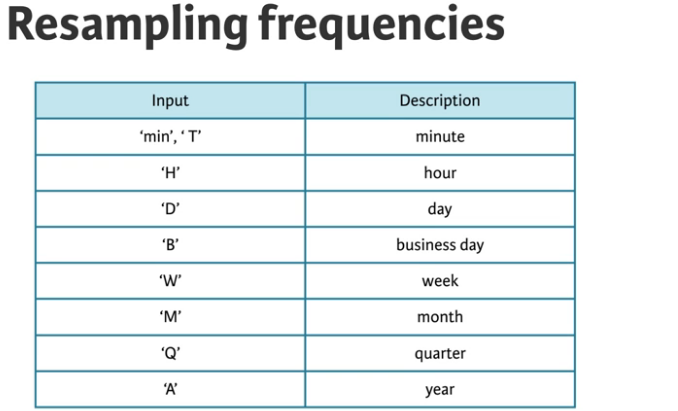

#### Multiplying Frequencies
We can use numerical values in the strings to mention a part of the time as follows:
    
    sales.loc[:,'Units'].resample('2W').sum()
    
#### Upsampling and filling - **Interpolation**
    two_days.resample('4H').ffill()
    
#### What is Resampling
For example, if you have hourly data, and just need daily data, pandas will not guess how to throw out the 23 of 24 points. You must specify this in the method. One approach, for instance, could be to take the mean, as in `df.resample('D').mean().`